In [98]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import pandas as pd

In [281]:
def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()
    
    if hist.sum() != 0:
        hist /= hist.sum()

    return hist

def plot_colors(hist, centroids):
    colors = []
    for (percent, color) in zip(hist, centroids):
        color = tuple(color.astype("uint16"))
        colors.append((color, percent))
    return colors

def image_color_cluster(image_path, k=4, skip_ranges=None):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters=k)
    clt.fit(image)

    hist = centroid_histogram(clt)
    colors = plot_colors(hist, clt.cluster_centers_)
    if skip_ranges is not None:
        filtered_colors = [color for color in colors if not all(skip[0] <= c <= skip[1] for c, skip in zip(color[0], skip_ranges))]
        return hist, filtered_colors
    else:
        return hist, colors

In [282]:
image_path = 'C:/Users/user/Desktop/color/test_revised.jpg'
hist, filtered_colors = image_color_cluster(image_path, k=4, skip_ranges=[(200, 255), (200, 255), (200, 255)])

In [283]:
def color_to_df(input):
    df_rgb = [(color[0][0], color[0][1], color[0][2]) for color in input]
    df_percent = [color[1] for color in input]

    df = pd.DataFrame(zip(df_rgb, df_percent), columns = ['c_code','occurence'])
    return df

In [284]:
df_color = color_to_df(filtered_colors)
df_color

,c_code,occurence
0,"(2, 174, 242)",0.313758
1,"(77, 126, 182)",0.346241
2,"(5, 110, 187)",0.140549


In [299]:
image_path = 'C:/Users/user/Desktop/color/test_revised.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)

list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
sum_precent = sum(list_precent)
text_c = [str(c) + ' ' + str(round(p*100/sum_precent, 1)) + '%' if sum_precent != 0 else str(c) + ' 0.0%' for c, p in zip(list_color, list_precent)]

normalized_colors = [(c[0]/255, c[1]/255, c[2]/255) for c in list_color]
    fig, ax = plt.subplots(figsize=(90, 90), dpi=10)
    wedges, text = ax.pie(list_precent,
                          labels=text_c,
                          labeldistance=1.05,
                          colors=normalized_colors,
                          textprops={'fontsize': 120, 'color': 'black'}
                         )

IndentationError: unexpected indent (1264629306.py, line 11)

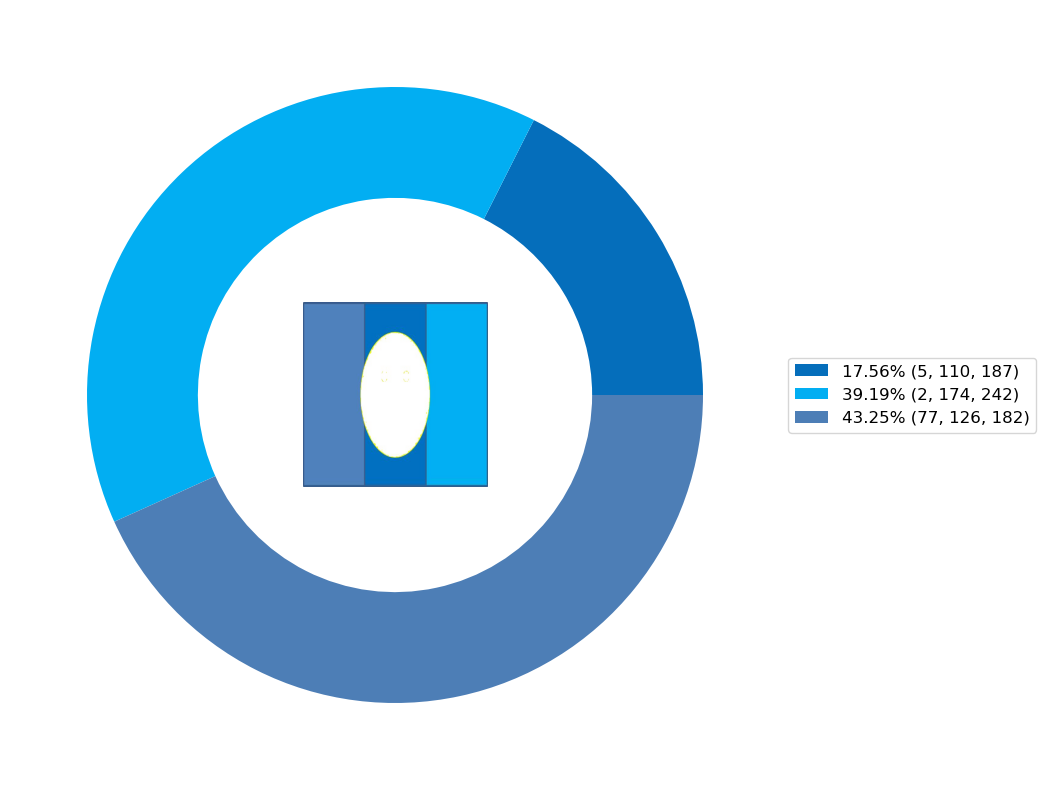

In [321]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

palette = np.array([(5, 110, 187), (2, 174, 242), (77, 126, 182)])
percentages = np.array([0.140549, 0.313758, 0.346241])

# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = palette / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Load and display the image in the center
image_path = 'C:/Users/user/Desktop/color/test_revised.jpg'
image = mpimg.imread(image_path)
image_extent = (-0.3, 0.3, -0.3, 0.3)  # Adjust the extent based on the size of the image
ax.imshow(image, extent=image_extent)

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.show()

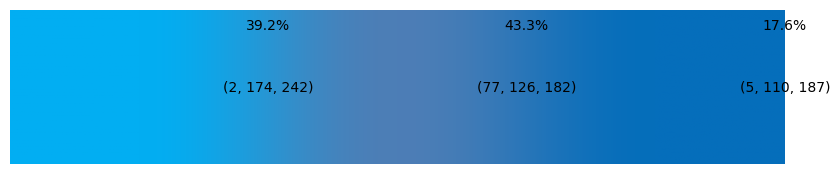

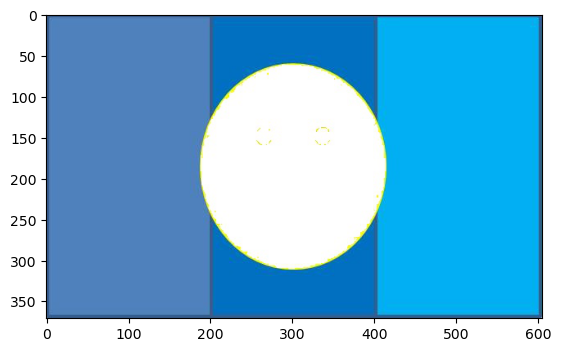

In [149]:
# calculate the normalization factor
norm_factor = df['occurence'].sum()

# create a numpy array with the RGB values
rgb_array = np.array([np.array(c) for c in df['c_code']]) / 255.0

# create a numpy array with the normalized percentage occurrences
percent_array = np.array(df['occurence']) / norm_factor

# calculate the sum of the normalized percentages
sum_percent = percent_array.sum()

# if the sum is not exactly equal to 1, scale the percentages
if abs(sum_percent - 1) > 0.0001:
    percent_array /= sum_percent

# create a color palette
palette = np.zeros((100, len(rgb_array), 3))
for i in range(len(rgb_array)):
    palette[:, i, :] = rgb_array[i]

# plot the color palette
fig, ax = plt.subplots(figsize=(10, 2))
ax.imshow(palette, aspect='auto')
ax.axis('off')

# add text labels with the RGB values and their percentage occurrences
for i in range(len(rgb_array)):
    ax.text(i + 0.5, 50, str(df['c_code'][i]), ha='center', va='center', fontsize=10)
    ax.text(i + 0.5, 10, str(round(percent_array[i] * 100, 1)) + '%', ha='center', va='center', fontsize=10)

plt.show()


image_path = 'C:/Users/user/Desktop/color/test_revised.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)


In [194]:
import extcolors

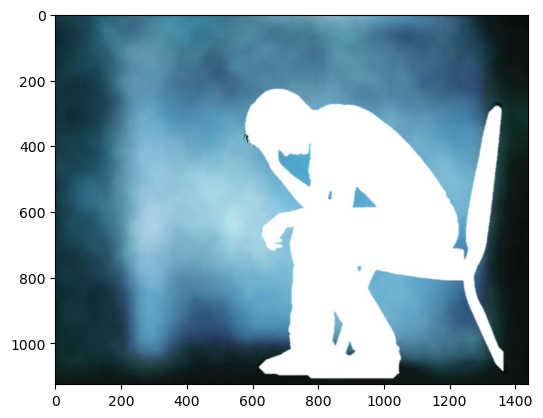

In [234]:
image_path = 'C:/Users/user/Desktop/color/depressed_revised.jpg'

image = mpimg.imread(image_path)
plt.imshow(image)

In [235]:
skip_ranges = [(200, 255), (200, 255), (200, 255),(200,255),(200,255)]
colors_x = extcolors.extract_from_path(image_path, tolerance=6, limit=6) #클러스터링에서 맨 처음 함수랑 비슷한듯
filtered_colors = [color for color in colors_x[0] if not all(skip[0] <= c <= skip[1] for c, skip in zip(color[0], skip_ranges))]
filtered_colors

[((79, 128, 160), 179448),
 ((111, 180, 209), 144759),
 ((18, 51, 60), 127273),
 ((92, 148, 171), 118052),
 ((14, 18, 17), 100259)]

In [248]:
def color_to_df(input):
    df_rgb = [(color[0][0], color[0][1], color[0][2]) for color in input]
    df_percent = [color[1] for color in input]

    df = pd.DataFrame(zip(df_rgb, df_percent), columns = ['c_code!','occurence!'])
    return df

In [249]:
df_color = color_to_df(filtered_colors)
df_color

,c_code!,occurence!
0,"(79, 128, 160)",179448
1,"(111, 180, 209)",144759
2,"(18, 51, 60)",127273
3,"(92, 148, 171)",118052
4,"(14, 18, 17)",100259


In [250]:
list_color = list(df_color['c_code!'])
list_precent = [int(i) for i in list(df_color['occurence!'])]

In [251]:
ret=np.array(list_color)
ret

array([[ 79, 128, 160],
       [111, 180, 209],
       [ 18,  51,  60],
       [ 92, 148, 171],
       [ 14,  18,  17]])

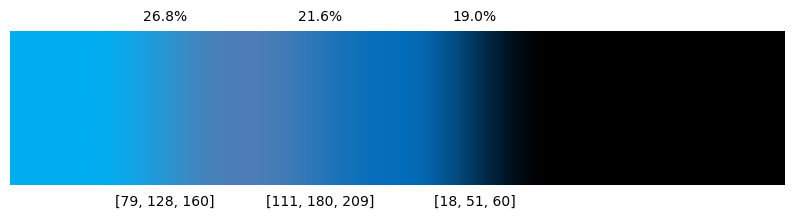

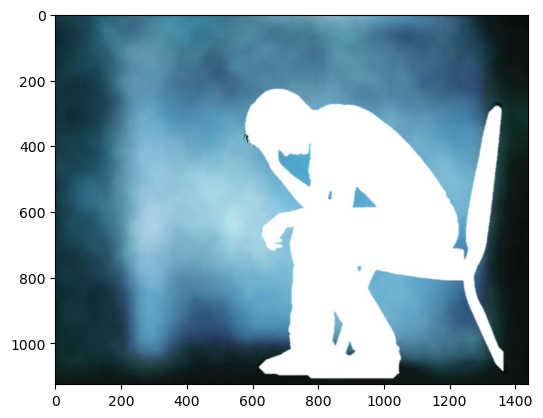

In [253]:
list_color = np.array([np.array(c) for c in df['c_code']]) / 255.0
# create a color palette
palette = np.zeros((100, 5, 3))
for i in range(len(list_color)):
    palette[:, i, :] = list_color[i]

# plot the color palette
fig, ax = plt.subplots(figsize=(10, 2))
ax.imshow(palette, aspect='auto')
ax.axis('off')

# add text labels with the RGB values and their percentage occurrences
for i in range(len(list_color)):
    ax.text(i + 0.5, 110, list(df_color['c_code!'][i]), ha='center', va='center', fontsize=10)
    ax.text(i + 0.5, -10, str(round(list_precent[i]/(179448+144759+127273+118052+100259)*100, 1)) + '%', ha='center', va='center', fontsize=10)

plt.show()

image_path = 'C:/Users/user/Desktop/color/depressed_revised.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)

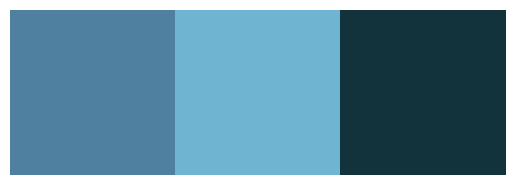

In [254]:
palette = [(79,128,160),(111,180,209),(18,51,60)]
palette = np.array(palette)[np.newaxis, :, :]

plt.imshow(palette)
plt.axis('off')
plt.show()